# Modell för smittspridning av mässlingen med olika vaccinationsgrader

Syfte:
    Kör en agentbaserad SIR-modell för mässling vid olika vaccinationsgrader och visar hur populationen utvecklas över tid.

Input:  
Inga externa inputs via parametrar. Modellparametrar anges direkt i filen:  
N: antal agenter  
width, height: area  
initial_infected: antal infekterade vid start  
vaccination_rate: vaccinationsgrad  
mortality_rate: dödlighet  
timesteps: antal tidssteg   

Output:  
Grafer över S, I, R och D  
Plottar Re (effektivt reproduktionstal)  
Utskrift av resultat för varje simulering

In [1]:
import importlib
import Agenter
import Modell

importlib.reload(Modell)
importlib.reload(Agenter)

import matplotlib.pyplot as plt

In [2]:
#Modellparametrar
N = 100000
width = 140
height = 70
initial_infected = 1
mortality_rate = 0.0021
timesteps = 150

## Vaccination rate: 50% (Lägre än IDAHO)

Här skapas en SIR-modell.  
Simulering av smittspridning körs med en  vaccinationsgrad på 50%. Skriver ut antalet suceptible (S), infected (I), recovered (R) och dead (D) efter 1000 dagar.

In [21]:
#Vaccinationsgrad 50%
vaccination_rate = 0.5

#Skapar modell med valda parametrar
model = Modell.SIRModel(N, width, height, initial_infected, vaccination_rate, mortality_rate)

for t in range(timesteps):
    model.step()

# Skriv ut resultat efter 1000 steg
print("S:", model.count_status("S"))
print("I:", model.count_status("I"))
print("R:", model.count_status("R"))
print("D:", model.count_status("D"))

S: 16
I: 0
R: 98884
D: 1100


In [4]:
model_df = model.datacollector.get_model_vars_dataframe()
agent_df = model.datacollector.get_agent_vars_dataframe()
model_df.head(10)

,Re,New Infected,Susceptible,Infected,Resistant,Dead,Total New Infected
0,0.000000,0,50301,1,49698,0,0
1,0.800000,4,50297,5,49698,0,4
2,0.615385,8,50289,13,49698,0,12
3,0.409091,9,50280,22,49698,0,21
4,0.541667,26,50256,48,49696,0,47
5,0.472527,43,50213,91,49696,0,90
6,0.441718,72,50146,163,49691,0,162
7,0.432056,124,50030,287,49683,0,286
8,0.339578,145,49890,427,49680,3,431
9,0.338095,213,49689,630,49677,4,644


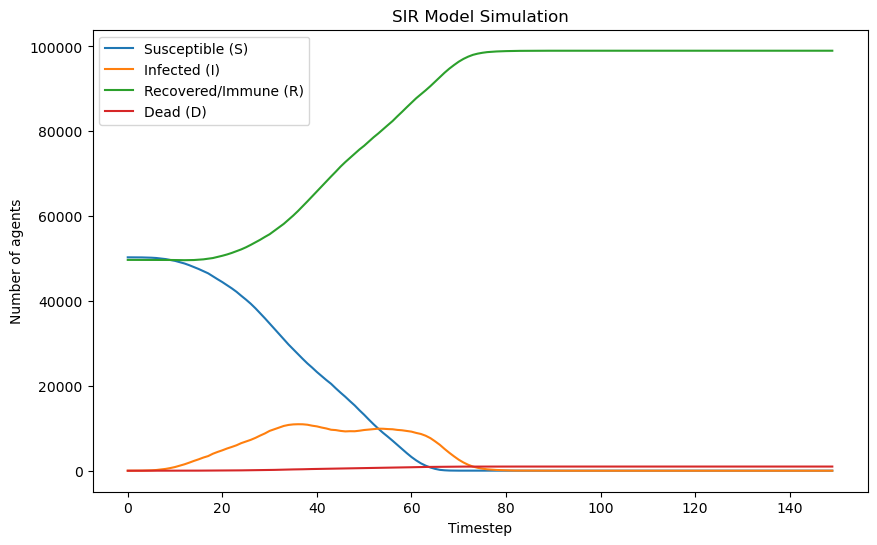

In [5]:
plt.figure(figsize=(10,6))
plt.plot(model_df["Susceptible"], label="Susceptible (S)")
plt.plot(model_df["Infected"], label="Infected (I)")
plt.plot(model_df["Resistant"], label="Recovered/Immune (R)")
plt.plot(model_df["Dead"], label="Dead (D)")
plt.xlabel("Timestep")
plt.ylabel("Number of agents")
plt.title("SIR Model Simulation")
plt.legend()
plt.show()

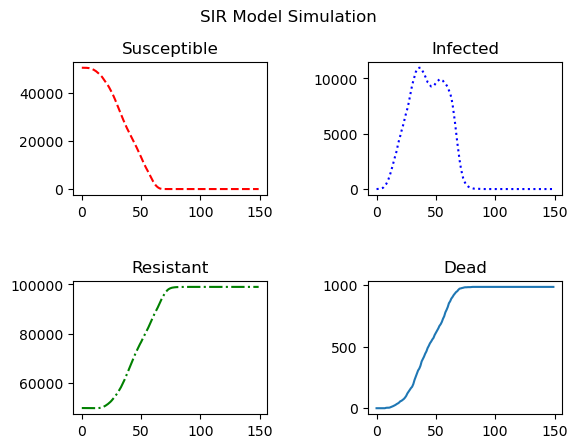

In [6]:
fig, axs = plt.subplots(2, 2)
axs[0, 0].plot(model_df["Susceptible"],'r--', label = "Susceptible")
axs[0, 0].set_title('Susceptible')
axs[0, 1].plot(model_df["Infected"],'b:', label = "Infected")
axs[0, 1].set_title('Infected')
axs[1, 0].plot(model_df["Resistant"],'g-.', label = "Resistant")
axs[1, 0].set_title('Resistant')
axs[1, 1].plot(model_df["Dead"], label = "Dead")
axs[1, 1].set_title('Dead')
plt.tight_layout(pad = 3.0)
fig.suptitle("SIR Model Simulation")
plt.show()

In [19]:
# Skapa dictionary: infector -> antal sekundära infektioner(hur många agenter som den personen har smittat)
secondary = {}
for event in model.infection_log: #går igenom alla smittningar
    inf = event["infector_id"]
    if inf is not None:
        secondary[inf] = secondary.get(inf, 0) + 1 #om man har smittat någon, läggs det till i dictionaryn

# Medelvärdet = Re
print(model_df["Re"].mean())

0.10395729605206555


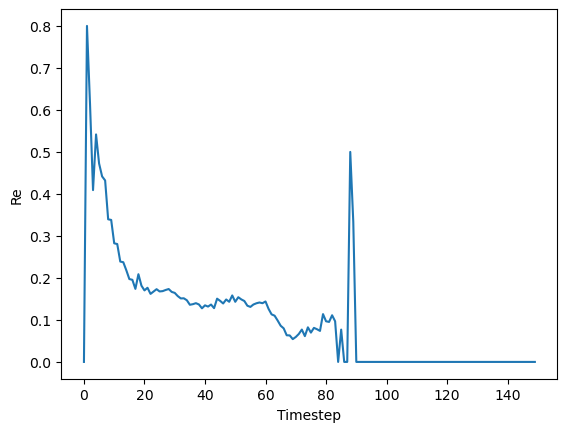

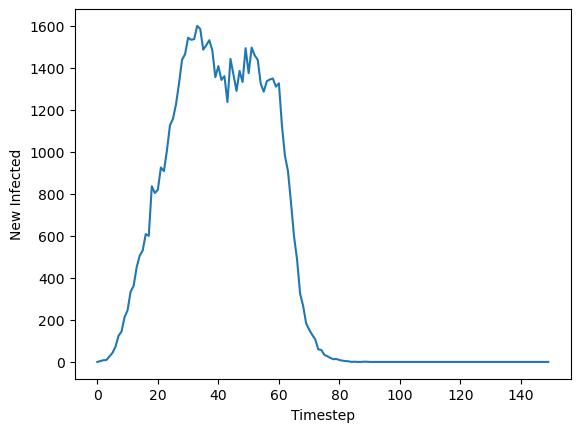

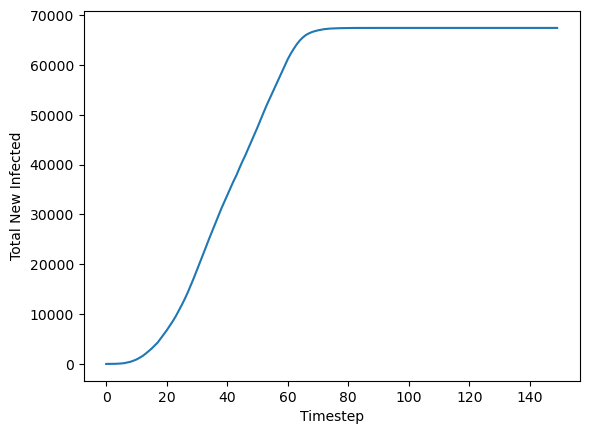

In [20]:
plt.plot(model_df["Re"])

plt.xlabel("Timestep")
plt.ylabel("Re")
plt.show()

plt.plot(model_df["New Infected"])
plt.xlabel("Timestep")
plt.ylabel("New Infected")
plt.show()

plt.plot(model_df["Total New Infected"])
plt.xlabel("Timestep")
plt.ylabel("Total New Infected")
plt.show()

## Vaccination rate: 78.5% (IDAHO)

In [9]:
#Ny simulering med 78.5% vaccinationsgrad

vaccination_rate_2 = 0.785

model_2 = Modell.SIRModel(N, width, height, initial_infected, vaccination_rate_2, mortality_rate)

#Kör simupleringen
for t in range(timesteps):
    model_2.step()

# Skriv ut resultat efter 1000 steg
print("S:", model_2.count_status("S"))
print("I:", model_2.count_status("I"))
print("R:", model_2.count_status("R"))
print("D:", model_2.count_status("D"))


S: 364
I: 3
R: 99098
D: 535


In [10]:
model_df_2 = model_2.datacollector.get_model_vars_dataframe()
agent_df_2 = model_2.datacollector.get_agent_vars_dataframe()

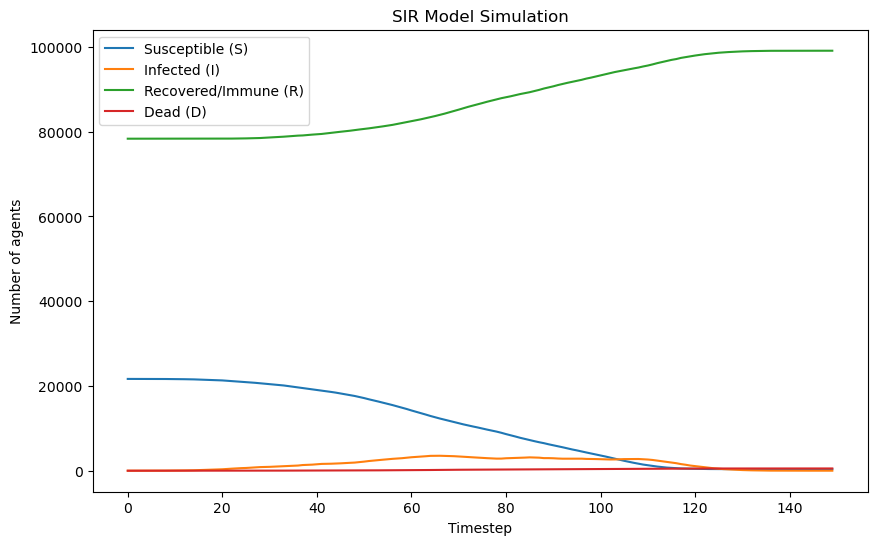

In [11]:
#SIRD-graf som plottar alla tillstånd i en graf

plt.figure(figsize=(10,6))
plt.plot(model_df_2["Susceptible"], label="Susceptible (S)")
plt.plot(model_df_2["Infected"], label="Infected (I)")
plt.plot(model_df_2["Resistant"], label="Recovered/Immune (R)")
plt.plot(model_df_2["Dead"], label="Dead (D)")
plt.xlabel("Timestep")
plt.ylabel("Number of agents")
plt.title("SIR Model Simulation")
plt.legend()
plt.show()

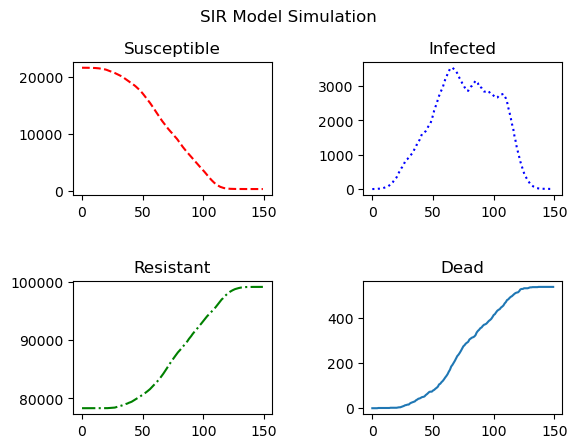

In [12]:
#Sublots, en för varje S, I, R, D.

fig, axs = plt.subplots(2, 2)
axs[0, 0].plot(model_df_2["Susceptible"],'r--', label = "Susceptible")
axs[0, 0].set_title('Susceptible')
axs[0, 1].plot(model_df_2["Infected"],'b:', label = "Infected")
axs[0, 1].set_title('Infected')
axs[1, 0].plot(model_df_2["Resistant"],'g-.', label = "Resistant")
axs[1, 0].set_title('Resistant')
axs[1, 1].plot(model_df_2["Dead"], label = "Dead")
axs[1, 1].set_title('Dead')
plt.tight_layout(pad = 3.0)
fig.suptitle("SIR Model Simulation")
plt.show()

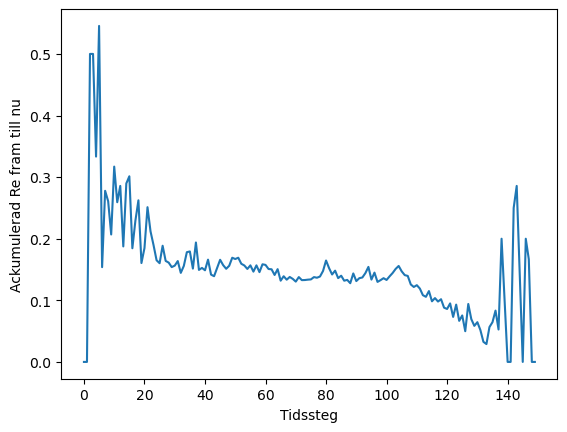

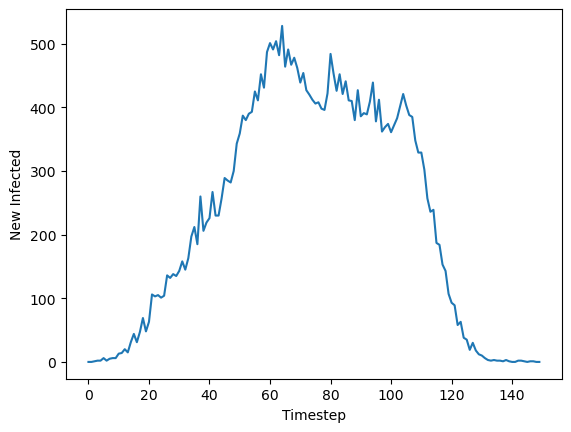

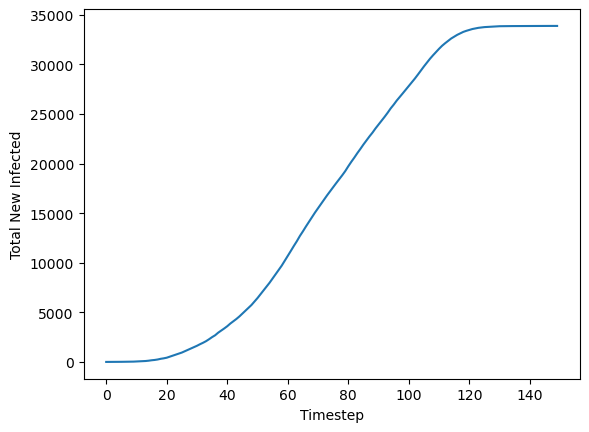

In [13]:
plt.plot(model_df_2["Re"])
plt.xlabel("Tidssteg")
plt.ylabel("Ackumulerad Re fram till nu")
plt.show()

plt.plot(model_df_2["New Infected"])
plt.xlabel("Timestep")
plt.ylabel("New Infected")
plt.show()

plt.plot(model_df_2["Total New Infected"])
plt.xlabel("Timestep")
plt.ylabel("Total New Infected")
plt.show()

## Vaccination rate: 95% (önskad vaccinationstäckning)

In [14]:
#Ny simulering med 95% vaccinationsgrad

vaccination_rate_3 = 0.95

model_3 = Modell.SIRModel(N, width, height, initial_infected, vaccination_rate_3, mortality_rate)

for t in range(timesteps):
    model_3.step()

# Skriv ut resultat efter 1000 steg
print("S:", model_3.count_status("S"))
print("I:", model_3.count_status("I"))
print("R:", model_3.count_status("R"))
print("D:", model_3.count_status("D"))


S: 5044
I: 0
R: 94956
D: 0


In [15]:
model_df_3 = model_3.datacollector.get_model_vars_dataframe()
agent_df_3 = model_3.datacollector.get_agent_vars_dataframe()

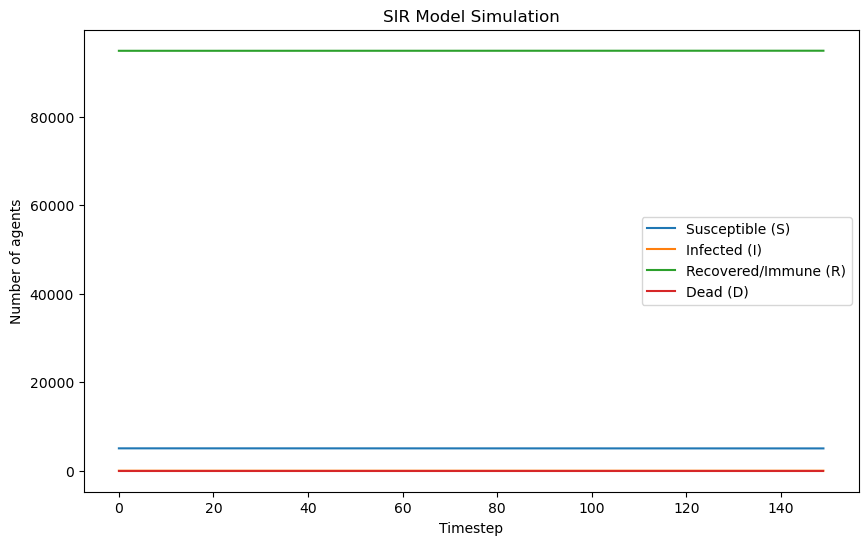

In [16]:
#Plottar SIRD-graf. Alla tillstånd i samma graf.
plt.figure(figsize=(10,6))
plt.plot(model_df_3["Susceptible"], label="Susceptible (S)")
plt.plot(model_df_3["Infected"], label="Infected (I)")
plt.plot(model_df_3["Resistant"], label="Recovered/Immune (R)")
plt.plot(model_df_3["Dead"], label="Dead (D)")
plt.xlabel("Timestep")
plt.ylabel("Number of agents")
plt.title("SIR Model Simulation")
plt.legend()
plt.show()

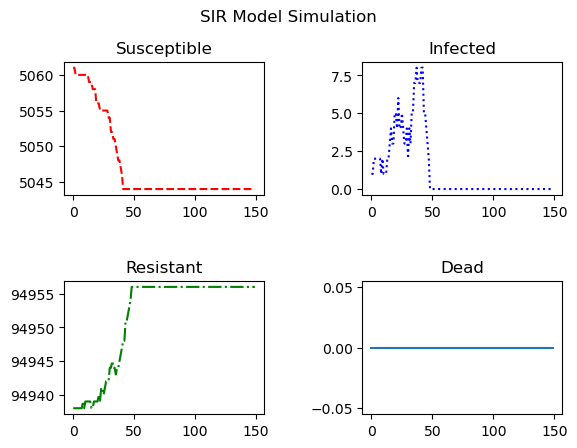

In [17]:
#Subplots. En för varje tillstånd S, I, R, D.

fig, axs = plt.subplots(2, 2)
axs[0, 0].plot(model_df_3["Susceptible"],'r--', label = "Susceptible")
axs[0, 0].set_title('Susceptible')
axs[0, 1].plot(model_df_3["Infected"],'b:', label = "Infected")
axs[0, 1].set_title('Infected')
axs[1, 0].plot(model_df_3["Resistant"],'g-.', label = "Resistant")
axs[1, 0].set_title('Resistant')
axs[1, 1].plot(model_df_3["Dead"], label = "Dead")
axs[1, 1].set_title('Dead')
plt.tight_layout(pad = 3.0)
fig.suptitle("SIR Model Simulation")
plt.show()

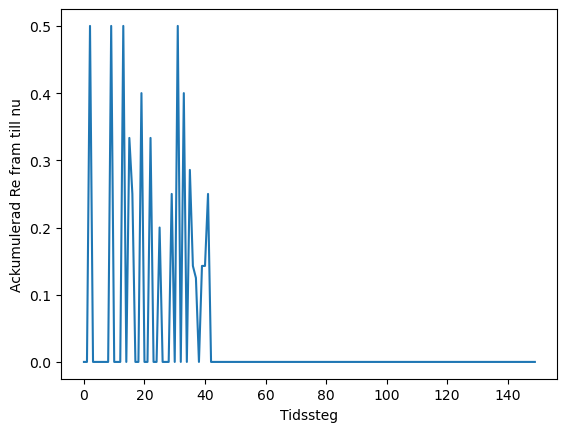

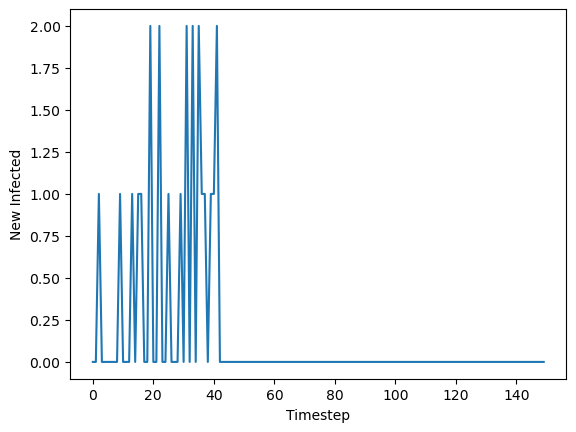

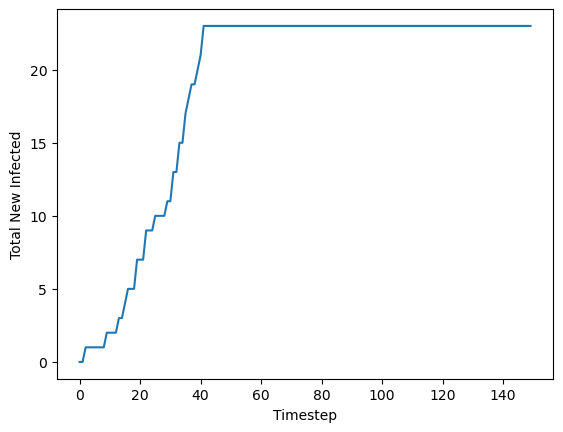

In [18]:
plt.plot(model_df_3["Re"])
plt.xlabel("Tidssteg")
plt.ylabel("Ackumulerad Re fram till nu")
plt.show()

plt.plot(model_df_3["New Infected"])
plt.xlabel("Timestep")
plt.ylabel("New Infected")
plt.show()

plt.plot(model_df_3["Total New Infected"])
plt.xlabel("Timestep")
plt.ylabel("Total New Infected")
plt.show()